# Programming Assignment 3: Clustering and Dimensionality Reduction

In [257]:
####################Do not change anything below
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image
from IPython.display import display

import sklearn.datasets as datasets
from sklearn.utils import shuffle

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn import metrics

#A different implementation of k-means
import scipy as sp
import scipy.cluster.vq
import scipy.spatial.distance
from scipy.spatial.distance import cdist, pdist

from sklearn.datasets import fetch_mldata, fetch_olivetti_faces
from sklearn.utils import shuffle 
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

import time
from collections import defaultdict

#################Might require installation of new packages
#Install selenium. Upgrade it if you have previously installed as recent version has some important bug fixes
import selenium.webdriver as webdriver
from selenium.webdriver.common.by import By

import json
from urlparse import parse_qs, urlsplit, urlunsplit

########################If needed you can import additional packages for helping you, although I would discourage it
########################Put all your imports in the space below. If you use some strange package, 
##########################provide clear information as to how we can install it.
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_moons
from sklearn.feature_extraction import DictVectorizer
from numpy.linalg import LinAlgError
import sklearn
#######################End imports###################################

In [186]:
#Set the colormap to jet. Most of the time this is good enough
# See http://matplotlib.org/examples/color/colormaps_reference.html for details
plt.set_cmap('jet')

# Part 1. Evaluation of $k$-Means over Diverse Datasets

In the first task, you will explore how $k$-Means perform on datasets with diverse structure. You will also explore different ways of customizing $k$-Means and learn about how to find good initialization and good value of $k$. 

In [187]:
#task t1a

#Write the code for the following function: 
#  Note that it is invoked from t1b and later tasks - so you might want to partially solve them to get the data
#  that is then used in this task
#The input arguments are:
#     original_data : This is a 2D original data . 
#          original_data[:, 0] gives the first dimension and original_data[:, 1] gives the second dimension
#     original_cluster_assignments: In general, you do not have the "correct" cluster assignments.
#          Since we used synthetic data, we can get it anyway. This variable gives the correct values
#     kmeanspp_cluster_assignments: This is the cluster assignment that we got from calling k-means 
#           with k-means++ as the initialization algorithm
#     kmeans_random_cluster_assignments: This is the cluster assignment that we got from calling k-means 
#           with random initialization

#The code must do the following:
#   Create a 1x3 subplot where you plot original_data in each of them
#   In the first sub-figure, you have to plot the cluster assignment from original_cluster_assignments
#   In the second sub-figure, you have to plot the cluster assignment from kmeanspp_cluster_assignments
#   In the third sub-figure, you have to plot the cluster assignment from kmeans_random_cluster_assignments
# Hint:
#   1. The scatter function has an argument called c that accepts a color sequence
#       Since all three figures plot the same data, think about how you can use the c argument
#       and the cluster assignments to show how the clustering worked
#   2. This function will be called for different datasets. So ensure that you create a new figure object
#        So that the images dont get super-imposed
def part1_plot_clustering(original_data, original_cluster_assignments, 
                              kmeanspp_cluster_assignments, kmeans_random_cluster_assignments):
    plt.figure()
    fig,axes = plt.subplots(1, 3, figsize=(15,4))
    
    #Change below: call scatter plot function on axes[0]
    axes[0].scatter(original_data[:, 0],original_data[:, 1], c=original_cluster_assignments)
    axes[0].set_title('Original')
    
    #Change below: call scatter plot function on axes[1]
    axes[1].scatter(original_data[:, 0],original_data[:, 1], c=kmeanspp_cluster_assignments)
    axes[1].set_title('Init=K-Means++')
    
    #Change below: call scatter plot function on axes[2]
    axes[2].scatter(original_data[:, 0],original_data[:, 1], c=kmeans_random_cluster_assignments)
    axes[2].set_title('Init=Random')

[[ 5.62930751 -4.16861737]
 [-4.25402493  5.92936468]
 [-1.14986255  5.51731899]
 [-5.92179508  2.2297414 ]]


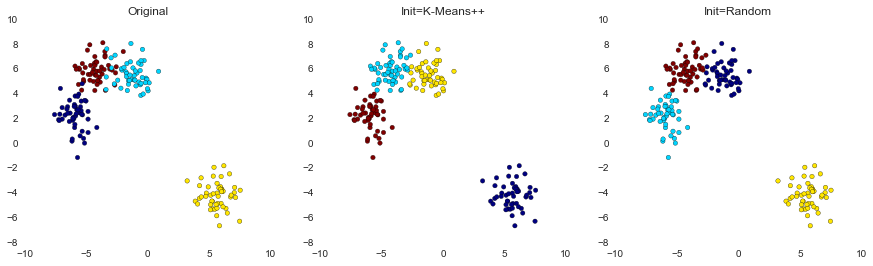

In [188]:
#task t1b
#Scikit-learn has a number of functions to generate synthetic data.
# For the first assignment, you will be using make_blobs function
# See url http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html for details
# Create a dataset with 200 2-D points with 4 cluster with a standard deviation of 1.0
# Remember to create it with a random state of 1234
# Remember to do it for all future tasks even if I forget to mention it :)

#Change below to Create a dataset with 200 2-D points with 4 cluster with a standard deviation of 1.0
t1b_data, t1b_ground_truth = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=1234)
#Change below: Call Kmeans with 4 clusters, with k-means++ initialization heuristic and random state of 1234
t1b_kmeanspp = KMeans(n_clusters=4, init='k-means++', random_state=1234)
kmeanspp_fit = t1b_kmeanspp.fit(t1b_data)
#Change below: Print the centroids
print kmeanspp_fit.cluster_centers_
#Change below: Find the cluster assignments for the data
t1b_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
#Change below: Call Kmeans with 4 clusters, with random initialization heuristic and random state of 1234
t1b_kmeans_random = KMeans(n_clusters=4, init='random', random_state=1234)
kmeans_random_fit = t1b_kmeans_random.fit(t1b_data)
#Change below: Find the cluster assignments for the data
t1b_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1b_data, t1b_ground_truth, t1b_kmeanspp_cluster_assignments, t1b_kmeans_random_cluster_assignments)

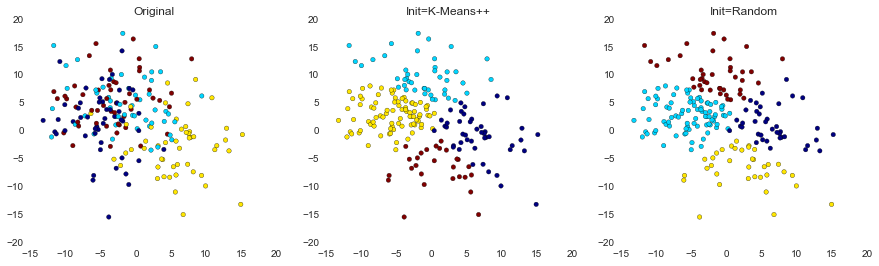

In [189]:
#task t1c
# Create a dataset (make_blobs) with 200 2-D points with 4 cluster with a standard deviation of 5.0
# Remember to create it with a random state of 1234

#Change below to Create a dataset with 200 2-D points with 4 cluster with a standard deviation of 5.0
t1c_data, t1c_ground_truth = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=5.0, random_state=1234)
#Change below: Call Kmeans with 4 clusters, with k-means++ initialization heuristic and random state of 1234
t1c_kmeanspp = KMeans(n_clusters=4, init='k-means++', random_state=1234)
kmeanspp_fit = t1c_kmeanspp.fit(t1c_data)
#Change below: Find the cluster assignments for the data
t1c_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
#Change below: Call Kmeans with 4 clusters, with random initialization heuristic and random state of 1234
t1c_kmeans_random = KMeans(n_clusters=4, init='random', random_state=1234)
kmeans_random_fit = t1c_kmeans_random.fit(t1c_data)
#Change below: Find the cluster assignments for the data
t1c_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1c_data, t1c_ground_truth, t1c_kmeanspp_cluster_assignments, t1c_kmeans_random_cluster_assignments)

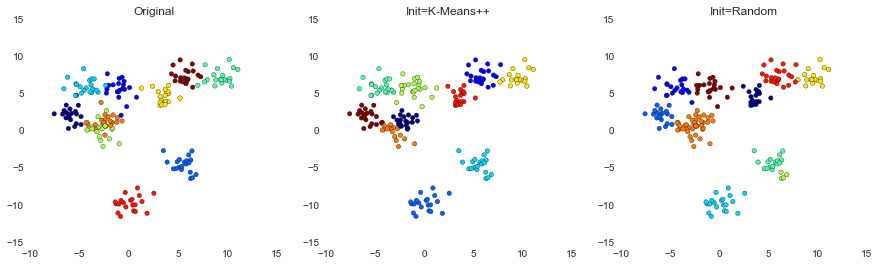

In [190]:
#task t1d
# Create a dataset (make_blobs) with 200 2-D points with 10 clusters and with a standard deviation of 1.0
# Remember to create it with a random state of 1234

t1d_data, t1d_ground_truth = make_blobs(n_samples=200, n_features=2, centers=10, cluster_std=1.0, random_state=1234)
t1d_kmeanspp = KMeans(n_clusters=10, init='k-means++', random_state=1234)
kmeanspp_fit = t1d_kmeanspp.fit(t1d_data)
t1d_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
t1d_kmeans_random = KMeans(n_clusters=10, init='random', random_state=1234)
kmeans_random_fit = t1d_kmeans_random.fit(t1d_data)
t1d_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1d_data, t1d_ground_truth, t1d_kmeanspp_cluster_assignments, t1d_kmeans_random_cluster_assignments)

#How does the result look?

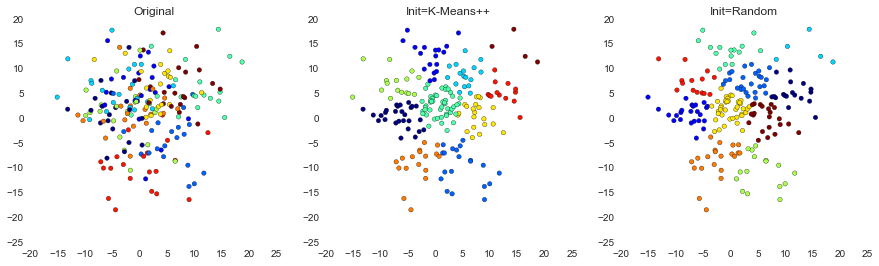

In [191]:
#task t1e
# Create a dataset (make_blobs) with 200 2-D points with 10 clusters and with a standard deviation of 5.0
# Remember to create it with a random state of 1234
# Then call K-Means with k=10

t1e_data, t1e_ground_truth = make_blobs(n_samples=200, n_features=2, centers=10, cluster_std=5.0, random_state=1234)
t1e_kmeanspp = KMeans(n_clusters=10, init='k-means++', random_state=1234)
kmeanspp_fit = t1e_kmeanspp.fit(t1e_data)
t1e_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
t1e_kmeans_random = KMeans(n_clusters=10, init='random', random_state=1234)
kmeans_random_fit = t1e_kmeans_random.fit(t1e_data)
t1e_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1e_data, t1e_ground_truth, t1e_kmeanspp_cluster_assignments, t1e_kmeans_random_cluster_assignments)

#How does the result look?

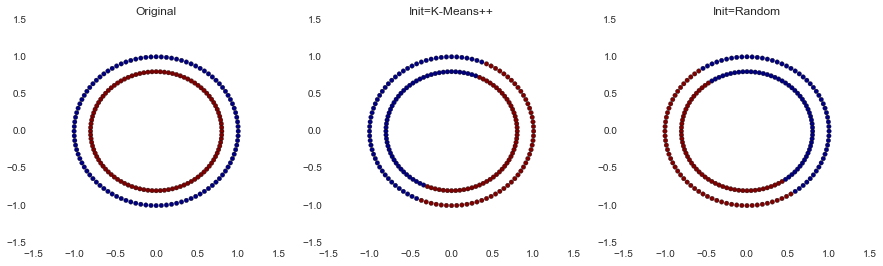

In [192]:
#task t1f
# For this assignment, you will be using make_circles function
# See url http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html for details
# Create a dataset with 200 2-D points 
# Remember to create it with a random state of 1234
#In the code, call the K-Means function with k=2

t1f_data, t1f_ground_truth = make_circles(n_samples=200, random_state=1234)
t1f_kmeanspp = KMeans(n_clusters=2, init='k-means++', random_state=1234)
kmeanspp_fit = t1f_kmeanspp.fit(t1f_data)
t1f_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
t1f_kmeans_random = KMeans(n_clusters=2, init='random', random_state=1234)
kmeans_random_fit = t1f_kmeans_random.fit(t1f_data)
t1f_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1f_data, t1f_ground_truth, t1f_kmeanspp_cluster_assignments, t1f_kmeans_random_cluster_assignments)

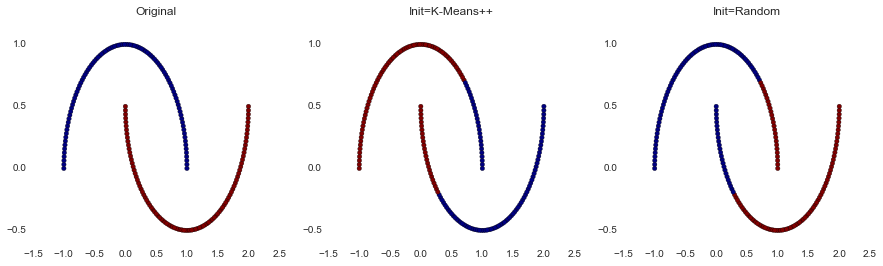

In [193]:
#task t1g
# For this assignment, you will be using make_moons function
# See url http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html for details
# Create a dataset with 200 2-D points 
# Remember to create it with a random state of 1234
#In the code, call the K-Means function with k=2

t1g_data, t1g_ground_truth = make_moons(n_samples=200, random_state=1234)
t1g_kmeanspp = KMeans(n_clusters=2, init='k-means++', random_state=1234)
kmeanspp_fit = t1g_kmeanspp.fit(t1g_data)
t1g_kmeanspp_cluster_assignments = kmeanspp_fit.labels_
t1g_kmeans_random = KMeans(n_clusters=2, init='random', random_state=1234)
kmeans_random_fit = t1g_kmeans_random.fit(t1g_data)
t1g_kmeans_random_cluster_assignments = kmeans_random_fit.labels_
part1_plot_clustering(t1g_data, t1g_ground_truth, t1g_kmeanspp_cluster_assignments, t1g_kmeans_random_cluster_assignments)

###$k$-Means and Image Compression via Vector Quantization

Here is a cool application of $k$-Means for image compression (we will discuss a more advanced method in dimensionality reduction later). The idea is incredibly simple. Suppose we have an image that has lot of colors that we wish to compress. One simple way is to reduce the number of colors. One of the compression techniques used by JPG is called run length encoding (RLE). Suppose you have a text like AAAAAAAABB, RLE compresses it to 8A2B. Intuitively, lesser colours will have longer runs and hence better compression.

Suppose we run $k$-Means on the image with a reasonably small $k$ where the data points are the pixels. For example, suppose we decide to use only 64 colours. Then we run $k$-Means with $k=64$. We then get the set of centroids which now correspond to "mean" (or representative) colors. We now replace the color of each pixel with the color provided by its centroid. This way, we quantize an image to have exactly $k$ colors. 

Here is a crude computation of the savings achieved. Each pixel in the original image is associated with 24 bits (8 bits each for RGB). So if the image is $128 \times 128$, we need  $128 \times 128 \times 24$ bits. Suppose we compressed it into 16 colors only. We now need to store two information: a dictionary of the 16 colors (which need $16 \times 24$ bits) and each pixel now can be represented using just 4 bits ($\lg 16 = 4$) and hence needs $128 \times 128 \times 4$. Overall we compressed the image by a factor of 6!!

In the following task, you will do a crude demonstration.

Width=427, Height=640, Depth=3
In 2-D the shape is  (273280, 3)


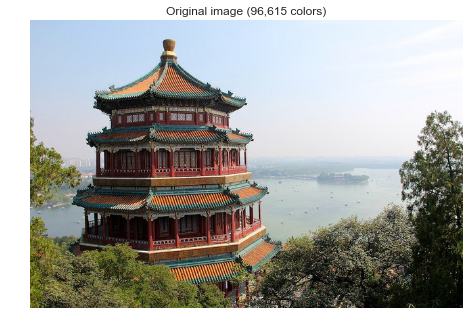

In [194]:
#Do not change anything below
#China is one of the sample figures in sklearn

#Code courtesy: Sklearn
#china is a 3-D array where the first two dimensions are co-ordinates of pixels (row and column)
# and third coordinate is a tuple with 3 values for RGB value
china = datasets.load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255
china_w, china_h, china_d = tuple(china.shape)
print "Width=%s, Height=%s, Depth=%s" % (china_w, china_h, china_d)
#Convert it to a 2D array for analysis
china_image_array = np.reshape(china, (china_w * china_h, china_d))
print "In 2-D the shape is ", china_image_array.shape

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


plt.figure()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

Handling k = 16
Handling k = 32
Handling k = 64
Handling k = 128
Clustering over entire data took 705.51196003 seconds


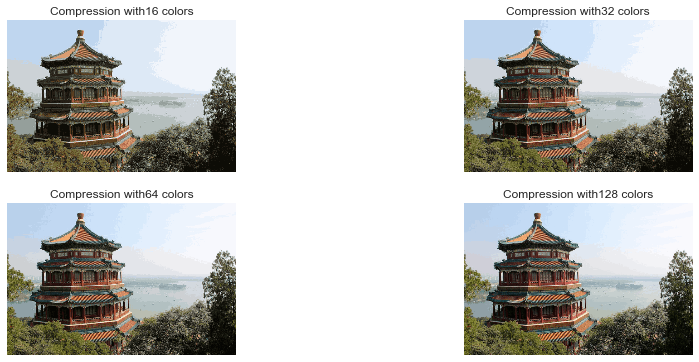

In [195]:
#t1h:

#This task could run for a long time on typical machines
#Let us run K-means with different values of k
# Then using the new centroids, compress the image and display it. 

t1h_start_time = time.time()
plt.figure()
fig,axes = plt.subplots(2, 2, figsize=(15,6))

#the 2d is for convenience
t1h_k_values = [[16, 32], [64,128]]
for i in range(2):
    for j in range(2):
        print "Handling k =", t1h_k_values[i][j]
        #Change below: call Kmeans with k=t1h_k_values [i][j] and random state = 1234
        t1h_kmeans_obj = KMeans(n_clusters=t1h_k_values[i][j], random_state=1234)
        #Change below: fit the object with china image array variable
        t1h_kmeans_fit = t1h_kmeans_obj.fit(china_image_array)
        axes[i][j].imshow(recreate_image(t1h_kmeans_fit.cluster_centers_, t1h_kmeans_fit.labels_, china_w, china_h))
        axes[i][j].set_title('Compression with' + str(t1h_k_values[i][j]) + " colors")
        
        axes[i][j].grid(False)
        axes[i][j].get_xaxis().set_ticks([])
        axes[i][j].get_yaxis().set_ticks([])

print "Clustering over entire data took %s seconds" % (time.time() - t1h_start_time)

Handling k = 16
Handling k = 32
Handling k = 64
Handling k = 128
Clustering with Sampling took 4.02238106728 seconds


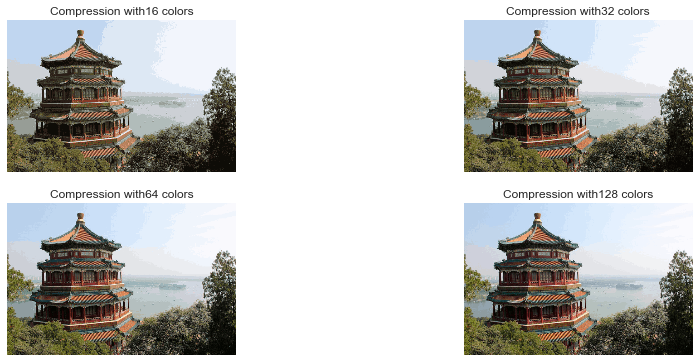

In [12]:
#t1i:
# Here is a much faster way using sampling which is how the quantization is done in real world
# We will study sampling in detail later in the class. But the idea is simple
# Instead of running the algorithm on the whole data, we run it on a subset (called a sample) 
#   which is picked uniformly at random
# Since the sample is small, your algorithm runs faster
# We then use the model to predict the correct cluster values for the entire data 
# You can see the speed difference clearly.

#Recall that there were 273280 pixels - let us take a sample of 1000 pixels which is approximately 0.3%
t1i_china_sample = shuffle(china_image_array, random_state=1234)[:1000]


#Let us run K-means with different values of k
# Then using the new centroids, compress the image and display it. 

t1i_start_time = time.time()
plt.figure()
fig,axes = plt.subplots(2, 2, figsize=(15,6))

#the 2d is for convenience
t1i_k_values = [[16, 32], [64,128]]    

for i in range(2):
    for j in range(2):
        print "Handling k =", t1i_k_values[i][j]
            
        #Change below: call Kmeans with k=t1h_k_values [i][j] and random state = 1234 
        t1i_kmeans_obj = KMeans(n_clusters=t1i_k_values[i][j], random_state=1234)
        #Change below: fit the object with the SAMPLE
        t1i_kmeans_fit = t1i_kmeans_obj.fit(t1i_china_sample)
        
        #After running k-means on the sample, we got k centroids
        # Now for each pixel in the original array you have to find the closest centroid
        #Change below: use the predict function of t1i_kmeans_fit for finding the closest centroid for entire image
        t1i_cluster_assignments = t1i_kmeans_fit.predict(china_image_array)
        
        axes[i][j].imshow(recreate_image(t1i_kmeans_fit.cluster_centers_, t1i_cluster_assignments, china_w, china_h))
        axes[i][j].set_title('Compression with' + str(t1h_k_values[i][j]) + " colors")

        axes[i][j].grid(False)
        axes[i][j].get_xaxis().set_ticks([])
        axes[i][j].get_yaxis().set_ticks([])
        

print "Clustering with Sampling took %s seconds" % (time.time() - t1i_start_time)

##Choosing Good values for $k$

One of the most important hyperparameters in $k$-Means algorithm is the optimal value of $k$. Some times, you might know $k$ by domain knowledge. For example, if you want to cluster MNIST data, you would use $k=10$ as there are 10 digits. However, given an arbitrary data (esp when it is high dimensional), it is very hard to find good $k$. There are many complex statistical measures for finding $k$. See http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set for a decent summary. However, almost all of them have some hidden assumptions and can be considered as heuristics only. Finding a good $k$ is a very hard problem. In this task, you will learn about three popular (and relatively simple) techniques. They are:

1. Elbow method (SSQ)  
2. Gap Statistic  
3. Gap Statistic differences

One thing to note is that we will be using a different implementation of $k$-Means for the gap statistic - the one from scipy.vq (vector quantization) module. You can read about it at http://docs.scipy.org/doc/scipy/reference/cluster.vq.html . The major difference is that it quantizes the data between [0,1] that simplifies our job in running some Monte Carlo simulations (a topic we will cover later in the class). I will be giving code for all three methods. The expectation for this task is for you to be just aware of these important methods.

In [255]:
#Do not change anything below

#All three functions were adapted from the code by Reid Johnson from University of Notre Dame

def compute_ssq(data, k, kmeans):
    dist = np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1)
    tot_withinss = sum(dist**2) # Total within-cluster sum of squares
    totss = sum(pdist(data)**2) / data.shape[0] # The total sum of squares
    betweenss = totss - tot_withinss # The between-cluster sum of squares
    return betweenss/totss*100
    
#Given a data (as nxm matrix) and an array of ks, this returns the SSQ (sum of squared distances)
# SSQ is also called as SSD or SSE


def ssq_statistics(data, ks, ssq_norm=True):
    ssqs = sp.zeros((len(ks),)) # array for SSQs (lenth ks)
    
    for (i,k) in enumerate(ks): # iterate over the range of k values
        kmeans = KMeans(n_clusters=k, random_state=1234).fit(data)
        
        if ssq_norm:
            ssqs[i] = compute_ssq(data, k, kmeans)
        else:
            # The sum of squared error (SSQ) for k
            ssqs[i] = kmeans.inertia_
    return ssqs

#This function computes the Gap statistic of the data (given as a nxm matrix)
# Returns:
#    gaps: an array of gap statistics computed for each k.
#    errs: an array of standard errors (se), with one corresponding to each gap computation.
#    difs: an array of differences between each gap_k and the sum of gap_k+1 minus err_k+1.

# The gap statistic measures the difference between within-cluster dispersion on an input
#  dataset and that expected under an appropriate reference null distribution.
# If you did not fully understand the definition, no worry - it is quite complex anyway :)
# However, you should know how to USE the gap statistic if not how it is computed
def gap_statistics(data, refs=None, nrefs=20, ks=range(1,11)):
    
    sp.random.seed(1234)
    shape = data.shape
    dst = sp.spatial.distance.euclidean
    
    if refs is None:
        tops = data.max(axis=0) # maxima along the first axis (rows)
        bots = data.min(axis=0) # minima along the first axis (rows)
        dists = sp.matrix(sp.diag(tops-bots)) # the bounding box of the input dataset
        
        # Generate nrefs uniform distributions each in the half-open interval [0.0, 1.0)
        rands = sp.random.random_sample(size=(shape[0],shape[1], nrefs))
        
        # Adjust each of the uniform distributions to the bounding box of the input dataset
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs
        
    gaps = sp.zeros((len(ks),))   # array for gap statistics (lenth ks)
    errs = sp.zeros((len(ks),))   # array for model standard errors (length ks)
    difs = sp.zeros((len(ks)-1,)) # array for differences between gaps (length ks-1)

    for (i,k) in enumerate(ks): # iterate over the range of k values
        # Cluster the input dataset via k-means clustering using the current value of k
        try:
            (kmc,kml) = sp.cluster.vq.kmeans2(data, k)
        except LinAlgError:
            kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(data)
            (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

        # Generate within-dispersion measure for the clustering of the input dataset
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        # Generate within-dispersion measures for the clusterings of the reference datasets
        refdisps = sp.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            # Cluster the reference dataset via k-means clustering using the current value of k
            try:
                (kmc,kml) = sp.cluster.vq.kmeans2(rands[:,:,j], k)
            except LinAlgError:
                kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(rands[:,:,j])
                (kmc, kml) = kmeans.cluster_centers_, kmeans.labels_

            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])

        # Compute the (estimated) gap statistic for k
        gaps[i] = sp.mean(sp.log(refdisps) - sp.log(disp))

        # Compute the expected error for k
        errs[i] = sp.sqrt(sum(((sp.log(refdisp)-sp.mean(sp.log(refdisps)))**2) \
                            for refdisp in refdisps)/float(nrefs)) * sp.sqrt(1+1/nrefs)

    # Compute the difference between gap_k and the sum of gap_k+1 minus err_k+1
    difs = sp.array([gaps[k] - (gaps[k+1]-errs[k+1]) for k in range(len(gaps)-1)])

    #print "Gaps: " + str(gaps)
    #print "Errs: " + str(errs)
    #print "Difs: " + str(difs)

    return gaps, errs, difs

In [171]:
#t1j
# Implement the following function plot_clustering_statistics
# It accepts three arguments: data as nxm matrix minimum and maximum value 
#   within which you think the best k lies. 
#  Of course, in the worst case this is between 1 and n (where n=number of data points)
#  You will compute the necessary statisitcs using the above function and 
#   use it to find a good $k$

# Finding a good k, even with the statistics is a bit tricky
#  So we will plot the values and find a good $k$ by visually inspecting the plot


#Interpreting the charts:
#  Elbow method: http://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_Elbow_Method
#  Gap Statistics: $k$ where the first drop in trend happens
#  Gap Statistics differences: $k$ where you get the first positive values
def t1j_plot_clustering_statistics(data, k_min, k_max):
 
    plt.figure()
    fig,axes = plt.subplots(1, 4, figsize=(16, 4))
    
    #range(a,b) returns a .. b-1
    ks = range(k_min, k_max+1)
    
    #Change below: plot the data distribution as a scatter plot on axes[0] variable
    # For now ignore the color field. We will use data where #clusters is easy to see
    axes[0].scatter(data[:, 0],data[:, 1])
    axes[0].set_title("Original Data")
    
    ssqs = ssq_statistics(data, ks=ks)
    #Change below: create a line chart with x axis as different k values 
    #  and y-axis as ssqs on axes[1] variable
    axes[1].plot(ks,ssqs)
    axes[1].set_title("Elbow Method and SSQ")
    axes[1].set_xlabel("$k$")
    axes[1].set_ylabel("SSQ")
  
    
    
    #Do not change anything below for the rest of the function
    # Code courtesy: Reid Johnson from U. of Notre Dame
    gaps, errs, difs = gap_statistics(data, nrefs=25, ks=ks)
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif
    if max_gap:
        print "By gap statistics, optimal k seems to be ", max_gap
    else:
        print "Please use some other metrics for finding k"
        
     #Create an errorbar plot
    rects = axes[2].errorbar(ks, gaps, yerr=errs, xerr=None, linewidth=1.0)

    #Add figure labels and ticks
    axes[2].set_title('Clustering Gap Statistics')
    axes[2].set_xlabel('Number of clusters k')
    axes[2].set_ylabel('Gap Statistic')
    axes[2].set_xticks(ks)
    # Add figure bounds
    axes[2].set_ylim(0, max(gaps+errs)*1.1)
    axes[2].set_xlim(0, len(gaps)+1.0)

    ind = range(1,len(difs)+1) # the x values for the difs
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif

    #Create a bar plot
    axes[3].bar(ind, difs, alpha=0.5, color='g', align='center')

    # Add figure labels and ticks
    if max_gap:
        axes[3].set_title('Clustering Gap Differences\n(k=%d Estimated as Optimal)' % (max_gap))
    else:
        axes[3].set_title('Clustering Gap Differences\n')
    axes[3].set_xlabel('Number of clusters k')
    axes[3].set_ylabel('Gap Difference')
    axes[3].xaxis.set_ticks(range(1,len(difs)+1))

    #Add figure bounds
    axes[3].set_ylim(min(difs)*1.2, max(difs)*1.2)
    axes[3].set_xlim(0, len(difs)+1.0)

By gap statistics, optimal k seems to be  2
By gap statistics, optimal k seems to be  5


//anaconda/lib/python2.7/site-packages/scipy/cluster/vq.py:600: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


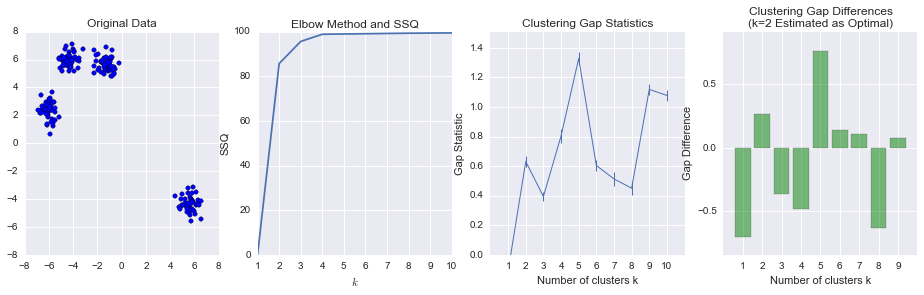

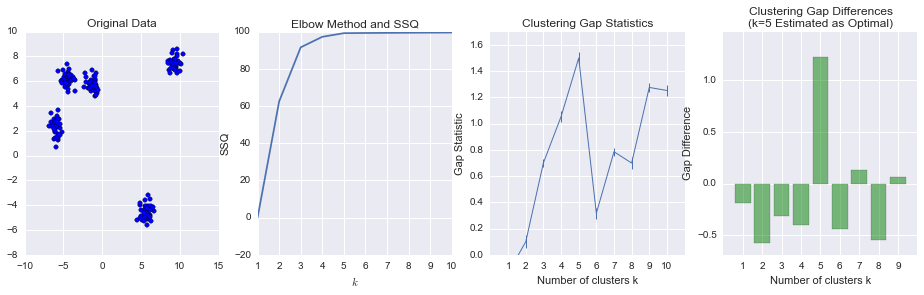

In [15]:
#Dont change anything here
t1j_data, t1j_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=1234)
t1j_plot_clustering_statistics(t1j_data, 1, 10)

t1j_data, t1j_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=0.5, random_state=1234)
t1j_plot_clustering_statistics(t1j_data, 1, 10)


# Part 2. Evaluation of Hierarchical Clustering over Diverse Datasets

In this task, you will explore hierarchical clustering over different datasets. You will also evaluate different ways to merge clusters and good way to find the cut-off point for breaking the dendrogram.

In [16]:
#task t2a

#Write the code for the following function: 
#  Note that it is invoked from t2b and later tasks - so you might want to partially solve them to get the data
#  that is then used in this task

#The input arguments are:
#     original_data : This is a 2D original data . 
#          original_data[:, 0] gives the first dimension and original_data[:, 1] gives the second dimension
#     original_cluster_assignments: In general, you do not have the "correct" cluster assignments.
#          Since we used synthetic data, we can get it anyway. This variable gives the correct values
#     ward_cluster_assignments: This is the cluster assignment that we got from calling 
#           hierarchical clustering with ward linkage
#     complete_cluster_assignments: This is the cluster assignment that we got from calling 
#           hierarchical clustering with complete linkage
#     average_cluster_assignments: This is the cluster assignment that we got from calling 
#           hierarchical clustering with average linkage

#The code must do the following:
#   Create a 1x4 subplot where you plot original_data in each of them
#   In the first sub-figure, you have to plot the cluster assignment from original_cluster_assignments
#   In the second sub-figure, you have to plot the cluster assignment from ward_linkage_cluster_assignments
#   In the third sub-figure, you have to plot the cluster assignment from complete_linkage_cluster_assignments
#   In the fourth sub-figure, you have to plot the cluster assignment from average_linkage_cluster_assignments

# Hint:
#   1. The scatter function has an argument called c that accepts a color sequence
#       Since all three figures plot the same data, think about how you can use the c argument
#       and the cluster assignments to show how the clustering worked
#   2. This function will be called for different datasets. So ensure that you create a new figure object
#        So that the images dont get super-imposed
def part2_plot_clustering(original_data, original_cluster_assignments, 
                              ward_linkage_cluster_assignments, complete_linkage_cluster_assignments, 
                              average_linkage_cluster_assignments):
    plt.figure()
    fig,axes = plt.subplots(1, 4, figsize=(16,4))
    
    #Change below: call scatter plot function on axes[0]
    axes[0].scatter(original_data[:, 0],original_data[:, 1],c=original_cluster_assignments)
    axes[0].set_title('Original')
    
    #Change below: call scatter plot function on axes[1]
    axes[1].scatter(original_data[:, 0],original_data[:, 1],c=ward_linkage_cluster_assignments)
    axes[1].set_title('Ward Linkage')
    
    #Change below: call scatter plot function on axes[2]
    axes[2].scatter(original_data[:, 0],original_data[:, 1],c=complete_linkage_cluster_assignments)
    axes[2].set_title('Complete Linkage')
    
    #Change below: call scatter plot function on axes[3]
    axes[3].scatter(original_data[:, 0],original_data[:, 1],c=average_linkage_cluster_assignments)
    axes[3].set_title('Average Linkage')    

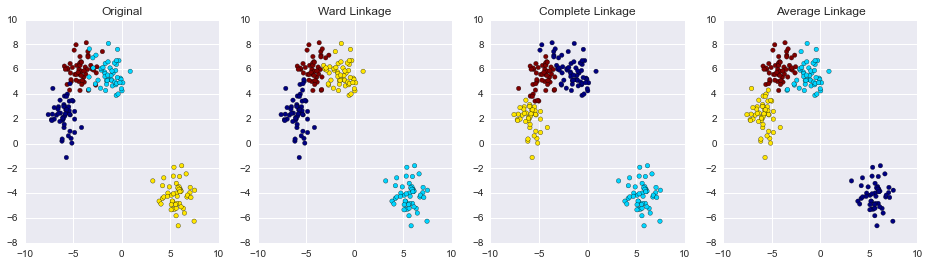

In [17]:
#Task t2b

#Change below to Create a dataset with make_blobs 200 2-D points with 4 cluster with a standard deviation of 1.0
t2b_data, t2b_ground_truth = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=1234)

#Change below: Call AgglomerativeClustering with 4 clusters with ward linkage
t2b_agg_ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
#Change below: Find the cluster assignments for the data
t2b_ward_linkage_cluster_assignments = t2b_agg_ward.fit(t2b_data).labels_

#Change below: Call AgglomerativeClustering with 4 clusters with complete linkage
t2b_agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
#Change below: Find the cluster assignments for the data
t2b_complete_linkage_cluster_assignments = t2b_agg_complete.fit(t2b_data).labels_

#Change below: Call AgglomerativeClustering with 4 clusters with average linkage
t2b_agg_average = AgglomerativeClustering(n_clusters=4, linkage='average')
#Change below: Find the cluster assignments for the data
t2b_average_linkage_cluster_assignments = t2b_agg_average.fit(t2b_data).labels_


part2_plot_clustering(t2b_data, t2b_ground_truth, t2b_ward_linkage_cluster_assignments, 
                            t2b_complete_linkage_cluster_assignments, t2b_average_linkage_cluster_assignments)

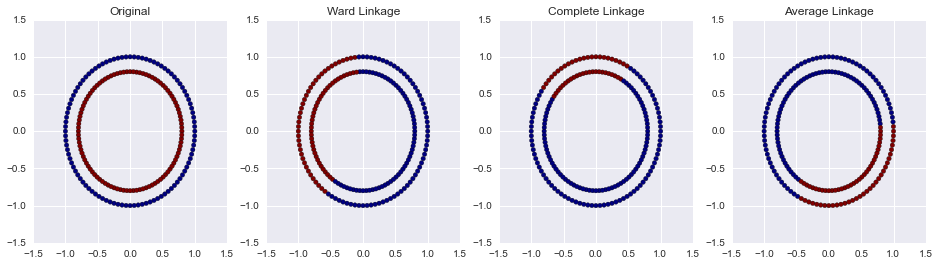

In [18]:
#Task t2c

#Change below to Create a dataset with make_circles function with 200 2-D points 
t2c_data, t2c_ground_truth = make_circles(n_samples=200, random_state=1234)

#Change below: Call AgglomerativeClustering with 2 clusters with ward linkage
t2c_agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
#Change below: Find the cluster assignments for the data
t2c_ward_linkage_cluster_assignments = t2c_agg_ward.fit(t2c_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with complete linkage
t2c_agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
#Change below: Find the cluster assignments for the data
t2c_complete_linkage_cluster_assignments = t2c_agg_complete.fit(t2c_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with average linkage
t2c_agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
#Change below: Find the cluster assignments for the data
t2c_average_linkage_cluster_assignments = t2c_agg_average.fit(t2c_data).labels_


part2_plot_clustering(t2c_data, t2c_ground_truth, t2c_ward_linkage_cluster_assignments, 
                            t2c_complete_linkage_cluster_assignments, t2c_average_linkage_cluster_assignments)

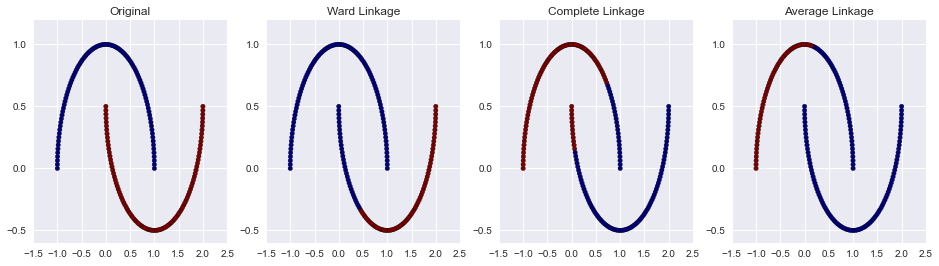

In [19]:
#Task t2d

#Change below to Create a dataset with make_moons function with 200 2-D points 
t2d_data, t2d_ground_truth = make_moons(n_samples=200, random_state=1234)

#Change below: Call AgglomerativeClustering with 2 clusters with ward linkage
t2d_agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
#Change below: Find the cluster assignments for the data
t2d_ward_linkage_cluster_assignments = t2d_agg_ward.fit(t2d_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with complete linkage
t2d_agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
#Change below: Find the cluster assignments for the data
t2d_complete_linkage_cluster_assignments = t2d_agg_complete.fit(t2d_data).labels_

#Change below: Call AgglomerativeClustering with 2 clusters with average linkage
t2d_agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
#Change below: Find the cluster assignments for the data
t2d_average_linkage_cluster_assignments = t2d_agg_average.fit(t2d_data).labels_


part2_plot_clustering(t2d_data, t2d_ground_truth, t2d_ward_linkage_cluster_assignments, 
                            t2d_complete_linkage_cluster_assignments, t2d_average_linkage_cluster_assignments)

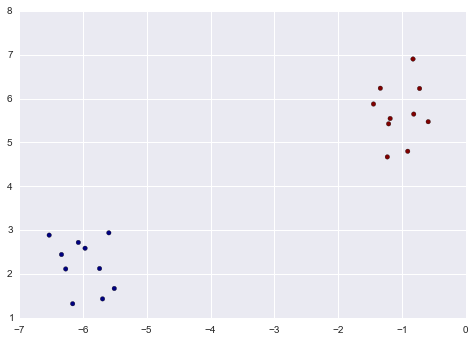

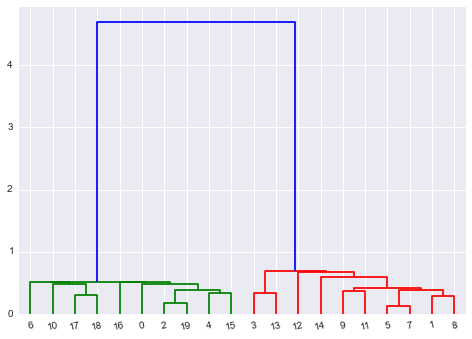

In [20]:
#t2e: Let us now create and visualize dendrogram for a toy datasset

t2e_data, t2e_ground_truth = datasets.make_blobs(n_samples=20, n_features=2, centers=2, cluster_std=0.5, random_state=1234)
plt.figure()
plt.scatter(t2e_data[:, 0], t2e_data[:, 1], c=t2e_ground_truth)
plt.show()

#Plot the dendrogram of t2edata
#Change below: compute the pairwise distance 
t2e_data_dist = metrics.pairwise.pairwise_distances(t2e_data)
#Change below: compute the linkage 
t2e_data_linkage = linkage(t2e_data)
#Change below: plot the dendrogram 
t2e_data_dendrogram = dendrogram(t2e_data_linkage)

# Part 3. Comparison of Clustering Evaluation Metrics

In the class, we mostly focused on SSE measure for evaluating how good a cluster is. There are many other statistical measures, and you will test them in this task. Broadly, they can split into two categories.

1. Metrics for Clustering evaluation when ground truth is known
2. Metrics for when ground truth is not known

The following url has helpful information: http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

##Ground Truth Cluster Assigments Available

Let us first consider the case where the ground truth cluster assignments are available. This is an ideal case and often in real world it is not the case (as clustering is part of unsupervised learning after all). However, since we created our datasets synthetically, it is possible to know the ground truth assignments.

In this task, you will evaluating the following metrics:

1. Adjusted Rand index
2. Adjusted Mutual Information Score
3. Homogeneity
4. Completeness
5. V-measure score

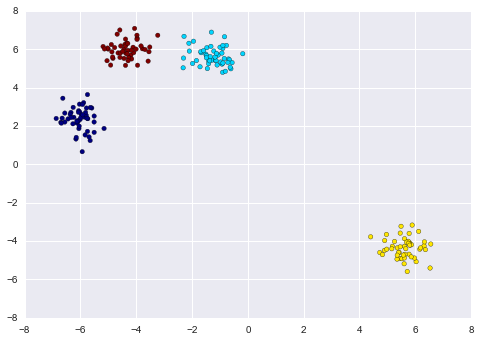

In [21]:
#Do not change anything below

#Let us create the data that we will be using to evaluate measures in the next cell
t3_data, t3_ground_truth = datasets.make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=1234)

t3_k_min = 1
t3_k_max = 10
t3_ind = range(t3_k_min, t3_k_max+1)


plt.figure()
plt.scatter(t3_data[:, 0], t3_data[:, 1], c=t3_ground_truth)
plt.show()


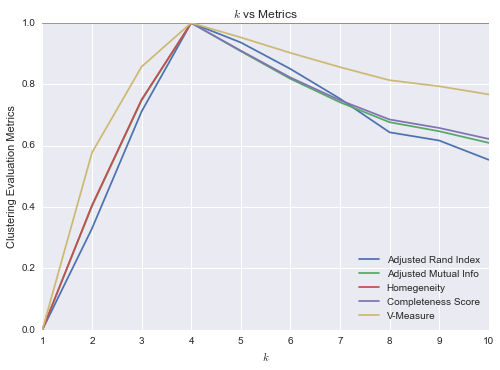

In [22]:
#Task t3a


t3a_adjusted_rand_index_scores = [0 for _ in t3_ind]
t3a_adjusted_mutual_info_scores = [0 for _ in t3_ind]
t3a_adjusted_homogeneity_scores = [0 for _ in t3_ind]
t3a_adjusted_completeness_scores = [0 for _ in t3_ind]
t3a_adjusted_v_measure_scores = [0 for _ in t3_ind]

for k in t3_ind:
    
    #Change below: Call KMeans with k clusters with k-means++ initialization and random state of 1234 
    t3a_kmeanspp = KMeans(n_clusters=k, init='k-means++', random_state=1234)
    #Change below: Find the cluster assignments for the data
    t3a_kmeanspp_cluster_assignments = t3a_kmeanspp.fit(t3_data).labels_
    
    #Now let us compute the clustering score for each metric (use metrics.xyz for getting function xyz)
    # Watch out for the argument order (true, predicted)
    
    #Change below: compute the score based on ADJUSTED random index
    t3a_adjusted_rand_index_scores[k-1] = metrics.adjusted_rand_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on ADJUSTED mutual information score
    t3a_adjusted_mutual_info_scores[k-1] = metrics.adjusted_mutual_info_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on homogeneity score
    t3a_adjusted_homogeneity_scores[k-1] = metrics.homogeneity_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on completeness index
    t3a_adjusted_completeness_scores[k-1] = metrics.completeness_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    #Change below: compute the score based on v-measure index
    t3a_adjusted_v_measure_scores[k-1] = metrics.v_measure_score(t3_ground_truth, t3a_kmeanspp_cluster_assignments)
    
    

plt.figure()
plt.plot(t3_ind, t3a_adjusted_rand_index_scores, label="Adjusted Rand Index")
plt.plot(t3_ind, t3a_adjusted_mutual_info_scores, label="Adjusted Mutual Info")
plt.plot(t3_ind, t3a_adjusted_homogeneity_scores, label="Homegeneity")
plt.plot(t3_ind, t3a_adjusted_completeness_scores, label="Completeness Score")
plt.plot(t3_ind, t3a_adjusted_v_measure_scores, label="V-Measure")

plt.title("$k$ vs Metrics")
plt.xlabel("$k$")
plt.ylabel("Clustering Evaluation Metrics")
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

##Ground Truth Cluster Assigments NOT Available

Let us now consider the case where the ground truth cluster assignments is not available. Often in real world you do not know the right "answer". Let us use the synthetic data we created above (but ignore the ground truth). We will consider three simple measures that analyze how good a particular clustering is. In this task, you will evaluating the following metrics:

1. SSQ
2. Silhoutte Coefficient
3. Stability


In [23]:
#Do not change anything below

#Code Courtesy: Derek Greene from University College, Dublin

#The following function computes pairwise stability of a list of clusterings
# the mean similarity between the clusterings as defined by a particular similarity metric. 
# In this case we use the Adjusted Rand Index to calculate the similarities.
def calc_pairwise_stability( clusterings, metric ):
    sim_values = []
    for i in range(len(clusterings)):
        for j in range(i+1,len(clusterings)):
            sim_values.append( metric( clusterings[i], clusterings[j] ) )
    return np.array( sim_values ).mean()

#Given data, take a sample, run k-means on it, make predictions
def t3_kmeans_sample( X, k, sampling_ratio ):
    # create a matrix with subset of samples
    n_samples = X.shape[0]
    indices = np.arange(n_samples)
    np.random.shuffle( indices )
    n_subset = int(n_samples * sampling_ratio) 
    X_subset = X[indices[0:n_subset]] 
    # cluster the subset
    clusterer = KMeans(n_clusters=k, n_init=1, init='random', max_iter = 100)
    clusterer.fit(X_subset)
    # produce an assignment for all samples
    return clusterer.predict(X)

//anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


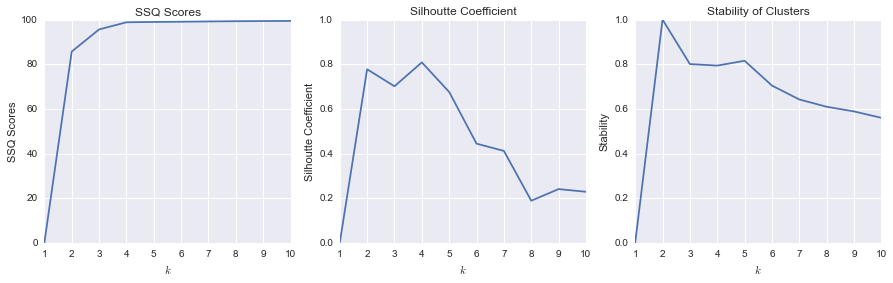

In [24]:
#Let us again use t3_data and t3_ground_truth, except we do not consider the ground truth. 

#Task t3b

t3b_ssq_scores = [0 for _ in t3_ind]
t3b_silhoutte_coefficient_scores = [0 for _ in t3_ind]
t3b_stability_scores = [0 for _ in t3_ind]

for k in t3_ind:
    
    #Change below: Call KMeans with k clusters with k-means++ initialization and random state of 1234 
    t3b_kmeanspp = KMeans(n_clusters=k, random_state=1234)
    #Change below: fit t3b_kmeanspp to data
    t3b_kmeanspp_fitted = t3b_kmeanspp.fit(t3_data)
    #Change below: Find the cluster assignments for the data
    t3b_kmeanspp_cluster_assignments = t3b_kmeanspp_fitted.labels_
    
    
    #Now let us compute the clustering score for each metric (use metrics.xyz for getting function xyz)
    # Watch out for the argument order (true, predicted)
    
    #Change below: compute ssq score using compute_ssq function
    t3b_ssq_scores[k-1] = compute_ssq(t3_data,k,t3b_kmeanspp)
    
    #Change below: compute the score based on silhouette_score with a sample size of 50
    #Note: do not set random state here - else it will give a constant score
    # Your results might look quite different from mine
    if k == 1: #Stability is defined for k >= 2
        continue
    t3b_silhoutte_coefficient_scores[k-1] = metrics.silhouette_score(t3_data, t3b_kmeanspp_cluster_assignments, metric='euclidean', sample_size=50, random_state=None)
    
    #Do not change: compute the score based on stability score
        
    #Run k-means on a small sample , make predictions based on the sample centroids and see how stable they are
    np.random.seed(1234)
    t3b_stability_clusterings = [t3_kmeans_sample( t3_data, k, 0.5 ) for run in range(10)]
    t3b_stability_scores[k-1] = calc_pairwise_stability(t3b_stability_clusterings, metrics.adjusted_rand_score)
        
    

#Do not change anything below
plt.figure()
fig,axes = plt.subplots(1, 3, figsize=(15,4))

axes[0].plot(t3_ind, t3b_ssq_scores)
axes[0].set_title('SSQ Scores')
axes[0].set_xlabel('$k$')
axes[0].set_ylabel('SSQ Scores')

axes[1].plot(t3_ind, t3b_silhoutte_coefficient_scores)
axes[1].set_title('Silhoutte Coefficient')
axes[1].set_xlabel('$k$')
axes[1].set_ylabel('Silhoutte Coefficient')
axes[1].set_ylim( (0.0, 1.0) )

axes[2].plot(t3_ind, t3b_stability_scores)
axes[2].set_title('Stability of Clusters')
axes[2].set_xlabel('$k$')
axes[2].set_ylabel('Stability')

plt.show()

#Part 4: Clustering your Facebook Friends

In this task, we will combine our knowledge of scraping and clustering to get details about your Facebook friends and cluster them. My original plan was to use Facebook SDK (Graph API etc). Unfortunately, v2 of their API does not provide details of your friends. It is a pity as I used to lot of fun things with their API couple of years ago. Also, their API is reasonably well designed that you can do lot of cool things with couple of lines of Python code. Oh well. Btw, to see what was possible, see this IPython notebook (http://nbviewer.ipython.org/github/chdoig/Mining-the-Social-Web-2nd-Edition/blob/master/ipynb/Chapter%202%20-%20Mining%20Facebook.ipynb). This was from the book Mining the Social Web (a great book, btw). Since Facebook removed the friends_like option, we have to do this the hard way.

Let us the scraping knowledge from Programming Assignment for this purpose. However, since this assignment's emphasis is on Clustering, I have scaled back my requirements so that you only spend little time on scraping. Nevertheless, I would encourage you to flesh this part more. It is an interesting side project :)

Here is the high level approach:

1. Use Python's selenium/webdriver package so as to visit Facebook pages via a browser
2. Use pattern.web library to parse the pages
3. Convert the parsed data of each friend into a vector
4. Run clustering algorithms on it

Some comments:

* I would suggest using Firefox or Chrome for this assignment. IE/Safari might work. But safer to stick to Firefox/Chrome
* You might want to stick to the browser that is not your default one. Also, preferrably avoid checking FB when the code is running (or use FB app in your smartphone!)
* Most of you used beautifulsoup in your first assignment. Selenium webdriver has some scraping functions that are philosophically very close to beautifulsoup/pattern.web. You should be able to get a hang of it quite soon! See http://selenium-python.readthedocs.org/en/latest/locating-elements.html#locating-elements for a quick refresher.
* I noticed that most of you have lot of friends (some even have close to 2000 friends!!). So, the code might take quite some time. 
* My suggestion would be to test your code on some small data and run it before going to sleep. Also I would recommend deactivating the screensaver/screen lock. While the screen lock did not have any effect in Linux, I am not sure about other OS. 
* I have included some throttling code that will hopefully prevent Facebook from showing captchas. On the flip side, this might make the code run longer . For eg, even a delay of 5 seconds for each friend might take an additional 3 hours if you have 2000 friends :) So plan accordingly!


In [420]:
#DO not change anything below

#Change to webdriver.Chrome() if Chrome is your primary browser.
#I suggest to let it run on Firefox
driver = webdriver.Firefox()
driver.maximize_window()

#Number of seconds to wait before each operation
#Change this if your internet is fast or if you are running it in UTA (reduce it to 2-3 seconds)
#I would nevertheless advice you to not alter it though.
SLEEP_TIME = 5

In [421]:
#Do not change anything below

#Facebook often appends some additional stuff to URLs for figuring out how you reached a resource
# Let us strip it out
def stripParamsFromUrl(url):
    scheme, netloc, path, query_string, fragment = urlsplit(url)
    return urlunsplit((scheme, netloc, path, '', ''))

def get_likes_url(url):
    if url[-1] != "/":
        url = url + "/"
    if url.find("profile.php") >= 0:
        url = url + "&sk=likes"
    else:
        url = url + "likes"
    return url

In [422]:
#Task t4a
def loginToFacebook(driver, user_name, password):
    #Change below: Go to facebook.com
    driver.get("https://www.facebook.com/")
    time.sleep(SLEEP_TIME)
    #Change below: Enter the value in user_name variable in the Email text box
    emailTextBox = driver.find_element_by_name('email')
    emailTextBox.send_keys(user_name) 
    #Change below: Enter the value in password variable in the Password text box
    passwordTextBox = driver.find_element_by_name('pass')
    passwordTextBox.send_keys(password)
    passwordTextBox.submit()

################REMEMBER TO REMOVE IT BEFORE SUBMITTING#########################
loginToFacebook(driver, "", "")

In [423]:
#DO not change anything below
def goto_profile_page(driver):
    #Notice how I get the element using a css selector
    elem = driver.find_element_by_css_selector("a._2dpe._1ayn")
    elem.click()
goto_profile_page(driver)

In [424]:
#DO not change anything below
def goto_friends_page(driver):
    #Notice that here I use a different trick - I use a custom attribute data-tab-key to get friends
    # This is preferrable than finding a css selector with weird class names like _2dpe
    # The other option is to directly construct the URL of friends tab.
    #  But depending on whether your friend has got a custom fb id or not, the url will be different
    #  This code keeps the code clean and neat :)
    elem = driver.find_element(By.CSS_SELECTOR, "[data-tab-key='friends']")
    elem.click()    
    time.sleep(SLEEP_TIME)

#Helper code to get all your friend names and their profile url
def get_all_friend_details(driver):
    
    try:
        #Get the friends pagelet. FB pages are organized by pagelets
        # Running your find element code within a pagelet is a good idea
        pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_friends > div[id^='collection_wrapper']")
        #Lot of you have hundreds of friends while FB only shows a small subset 
        # When you scroll down, it loads the remaining friends dynamically
        # Find how many friends are their initially
        len1 = len(pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a"))
    except Exception as ex:
        print "Caught exception in getting friends. Try again"
        return []
    
    while True:
        try:
            #Scroll down
            driver.execute_script("window.scrollBy(0,10000)", "")
            #wait for friend details to load
            time.sleep(SLEEP_TIME)
            #Find the friends pagelet again
            #Both the browser, FB and selenium do aggressive caching
            # Sometimes, this might cause invalid references
            # Hence, getting the pagelet object fresh is a good idea
            pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_friends > div[id^='collection_wrapper']")
            #Find how many friends you have after scrolling
            len2  = len(pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a"))
            #If it remained the same, we have loaded all of them
            # Else repeat the process
            if len1 == len2:
                break
            len1 = len2
        except Exception as ex:
            break
    
    #Now we have a page that has all the friends
    friends = []
    try:
        #Get the pagelet object 
        pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_friends > div[id^='collection_wrapper']")
        #Get the DOM object containing required details of your friends
        all_friends = pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a")
        if len(all_friends) == 0:
            return []
        else:
            for i in range(len(all_friends)):
                #Get their name
                name = all_friends[i].get_attribute("text") 
                #Get their profile url
                url = stripParamsFromUrl(all_friends[i].get_attribute("href"))
                friends.append( {"Name": name, "ProfileURL": url})
                if i % 100 == 0:
                    print "Handled %s friends" % (i,)
    except Exception as ex:
        pass
    return friends

#Store the list of friends to a file 
def log_friend_details_to_file(friends_details, file_name):
    with open(file_name, "w") as output_file:
        #Notice how we use json library to convert the array to a string and write to a file
        json.dump(friends_details, output_file)
        

In [425]:
#Do not change anything below
#Go to your friends page, collect their details and write it to an output file
goto_friends_page(driver)
friends_details = get_all_friend_details(driver)
log_friend_details_to_file(friends_details, "fb_friend_dtls.txt")

Handled 0 friends


In [426]:
#Task t4b: Collect the list of things your friend likes
def collect_friend_likes(driver, friend_name, friend_profile_url):
    #Directly go to likes tab of the url
    likes_url = get_likes_url(friend_profile_url)
    driver.get(likes_url)
    time.sleep(SLEEP_TIME)
    
    try:
        #Change below: get the likes pagelet pagelet_timeline_app_collection_100001137020875:2409997254:96
        pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_likes > div[id^='collection_wrapper']")
        #Change below: Get the list of items liked currently
        len1 = len(pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a"))
    except Exception as ex:
        #This person has no likes page or has not given us the permission
        return []
    
    while True:
        try:
            driver.execute_script("window.scrollBy(0,10000)", "")
            time.sleep(SLEEP_TIME)
            
            #Change below: get the likes pagelet
            pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_likes > div[id^='collection_wrapper']")
            #Change below: Get the list of items liked currently
            len2  = len(pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a"))
            
            if len1 == len2:
                break
            len1 = len2
        except Exception as ex:
            break
    
    friend_likes = []
    try:
        #Change below: get the likes pagelet
        pagelet = driver.find_element_by_css_selector("#pagelet_timeline_medley_likes > div[id^='collection_wrapper']")
        #Change below: Get the list of items liked currently - i.e. get the DOM object with their names
        all_friend_likes = pagelet.find_elements_by_css_selector("div.fsl.fwb.fcb > a")
        #print all_friend_likes
        #Change below: Get the list of items liked currently - i.e. get the DOM object with their type
        all_friend_like_types = pagelet.find_elements_by_css_selector("div._5k4f")
        
        pass
        if len(all_friend_likes) == 0:
            return []
        else:
            for i in range(len(all_friend_likes)):
                #Change below: get the name of the item your friend liked. Eg, Bill Gates
                like_name = all_friend_likes[i].get_attribute("text") 
                #Change below: get the type of the item your friend liked. Eg, Public Figure
                like_type = all_friend_like_types[i].text
                
                friend_likes.append( {"Item": like_name, "Type": like_type})
                #friend_likes.append( {"Type": like_type})
    except Exception as ex:
        pass
    
    return friend_likes

In [209]:
#Do not change below
#Here, we are going to collect the details of your friends

#Get list of friends
p4_friend_profile_dtls = json.loads(open("fb_friend_dtls.txt").read())

#In case your code crashed when handling the i-th friend, set offset to i. 
# That way, you will start from that friend instead of starting from scratch
p4_offset = 0

#Open file in append mode so that prior data if any persists
#If you want to start from scratch, remember to delete this file
output_file = open("fb_friend_like_dtls.txt", "a")
for i in range(p4_offset, len(p4_friend_profile_dtls)):
    friend_dtls = p4_friend_profile_dtls[i]
    friend_name, friend_profile_url = friend_dtls["Name"], friend_dtls["ProfileURL"]
    print "Handling friend %s : %s" % (i, friend_name)
    friend_like_dtls = collect_friend_likes(driver, friend_name, friend_profile_url)
    #Append friend_name so that it is findable later
    friend_like_dtls = {"Name": friend_name, "Likes":friend_like_dtls}
    json.dump(friend_like_dtls, output_file)
    output_file.write("\n")
    output_file.flush()
output_file.close()

Handling friend 0 : Suresh Ravi
Handling friend 1 : Shyam Subramanian
Handling friend 2 : Gowtham Vengu
Handling friend 3 : Sai Ram
Handling friend 4 : Nikin Bhargav
Handling friend 5 : Akilesh Rajan
Handling friend 6 : Sowmiya Ragu
Handling friend 7 : Vivek Vaidyanathasubramanian
Handling friend 8 : Saravanan Thirumuruganathan
Handling friend 9 : Aditya Vudayagiri
Handling friend 10 : Divya Bharathi
Handling friend 11 : Afifa Kauser Shariff
Handling friend 12 : Venkatesh Gandhi Rajan
Handling friend 13 : Vignesh Rao
Handling friend 14 : Suhani Mehta
Handling friend 15 : Dasari Prakashini
Handling friend 16 : Sathvik Reddy
Handling friend 17 : Kamal Prakash
Handling friend 18 : Adeetya Ravisankar
Handling friend 19 : Vivek R. Bharathwaj
Handling friend 20 : Vaikunth Sridharan
Handling friend 21 : Vivek Rahul
Handling friend 22 : Hemanth Kumar
Handling friend 23 : Prashanth Gandhidoss
Handling friend 24 : Deepak Raj
Handling friend 25 : Bharatwaj Sankaran
Handling friend 26 : Sujay Nata

In [236]:
#Do not change anything below
#This variable has details of your friends in an array
# i-th element gives details about i-th friend
p4_fb_friend_like_dtls = [json.loads(line) for line in open("fb_friend_like_dtls.txt").readlines()]

In [427]:
#Task t4c:

#We now have a list of items your friends liked. But this is in an unstructured format
# We need to convert it to a structured format

#Step 1: We are going to analyze the data to find the different types of items your friends liked and 
#   and categorize them accordingly.

#Suppose friend1 liked { Bill Gates : Public Figure, Kamal Haasan : Actor/Director} 
#  and friend2 liked { Bill Gates : Public Figure, Aamir Khan: Public Figure, Sachin Tendulkar : Athlete}
# Your code below must produce the following dict
#{
#    Public Figure: set([Bill Gates, Aamir Khan]),
#    Actor/Director: set([Kamal Haasan]),
#    Athlete: set([Sachin Tendulkar])
#}

#We will use a nifty Python package called defaultdict.
# See https://docs.python.org/2/library/collections.html#defaultdict-examples for some examples
# Here we have instantiatated it so that this is dictionary where the default value type is set
t4c_categorized_friend_likes = defaultdict(set)
#a = friend_like_dtls["Likes"]

for i in range(len(p4_fb_friend_like_dtls)):
    #Change below: set the variable to the list of items liked by i-th friend
    #p4_friend_i_likes should now be an array of dictionaries each with two keys: 
    #  "Item": name of the item, "Type": the type of item
    p4_friend_i_likes = p4_fb_friend_like_dtls[i]["Likes"]
    #print len(p4_friend_i_likes)
    #b = p4_friend_i_likes[i]
    #c = p4_friend_i_likes['Type']
    
    
    for j in range(len(p4_friend_i_likes)):
        p4_friend_i_likes_j_th_entry = p4_friend_i_likes[j]
        #Change below: assign it to name of the item
        t4c_friend_like_item_name = p4_friend_i_likes_j_th_entry["Item"]
        #print t4c_friend_like_item_name
        #Change below: assign it to type of the item
        t4c_friend_like_item_type = p4_friend_i_likes_j_th_entry["Type"]
        #print t4c_friend_like_item_type
        
        #Change below: put each item into appropriate set    
        #do something with t4c_categorized_friend_likes, t4c_friend_like_item_type and t4c_friend_like_item_name
        t4c_categorized_friend_likes[t4c_friend_like_item_type].add(t4c_friend_like_item_name)
        #print a
#print t4c_categorized_friend_likes.items()
#Do not change anything below

#By default set and dict have no ordering.
#But if we want to convert to a vector, we need a particular ordering
# So we are going to use them in the sorted order
#Sorted list of categories


t4_item_categories = sorted(t4c_categorized_friend_likes.keys())
print t4_item_categories

t4_num_liked_item_categories = len(t4_item_categories)
t4_num_liked_items = 0

t4_categorized_friend_likes = defaultdict(set)
for category in t4_item_categories:
    t4_categorized_friend_likes[category] = sorted(t4c_categorized_friend_likes[category])
    t4_num_liked_items = t4_num_liked_items + len(t4_categorized_friend_likes[category])
    

#t4_item_categories: SORTED list of categories such as Actor, Public Figure etc
#t4_num_liked_item_categories: number of categories liked
#t4_categorized_friend_likes: a dictionary where for each category, you have a SORTED list of items
#t4_num_liked_items: number of items all your friends liked overall

[u'Actor/Director', u'Advertising agency', u'Advertising service', u'Aerospace/Defence', u'Airline', u'Airport', u'Airport terminal', u'Album', u'Alternative & Holistic Health', u'Amateur Sports Team', u'Amusement', u'Animal shelter', u'Apartment & Flat Building', u'App Page', u'Appliances', u'Architect', u'Armed forces', u'Art gallery', u'Artist', u'Artistic services', u'Arts & Marketing', u'Arts & entertainment', u'Arts/Entertainment/Nightlife', u'Arts/Humanities Website', u'Asian fusion restaurant', u'Attractions/Things to Do', u'Audiovisual equipment', u'Author', u'Automotive', u'Automotive consultant', u'Automotive customisation', u'Automotive manufacturing', u'Automotive parts & accessories', u'Automotive repair', u'Automotive restoration', u'Automotive wholesaler', u'Baby Goods/Kids Goods', u'Bags/Luggage', u'Bakery', u'Bands & musicians', u'Bank', u'Bank/Financial Institution', u'Bar', u'Bar & Grill', u'Barbecue restaurant', u'Beach', u'Beach resort', u'Beauty salon', u'Biotech

In [238]:
#Do not change below
#{
#    Public Figure: set([Bill Gates, Aamir Khan]),
#    Actor/Director: set([Kamal Haasan]),
#    Athlete: set([Sachin Tendulkar])
#}

####Becomes

#t4_item_categories = [Actor/Director, Athlete, Public Figure]
#t4_categorized_friend_likes = 
#{
#    Actor/Director: set([Kamal Haasan]),
#    Athlete: set([Sachin Tendulkar])
#    Public Figure: set([Aamir Khan, Bill Gates]),
#}

#We are now going to convert a tuple of (type, item) into an index
# For eg, 
#    (Actor/Director, Kamal Haasan) => 0
#    (Athlete, Sachin Tendulkar) => 1
#    (Public Figure, Aamir Khan) => 2
#    (Public Figure, Bill Gates) => 3
t4_item_category_to_index_dict = {}
temp_index = 0
for category in t4_item_categories:
    for item in t4_categorized_friend_likes[category]:
        t4_item_category_to_index_dict[(category, item)] = temp_index
        temp_index += 1

In [239]:
#Task t4d
#Let us convert each friend to a vector. We will follow a simple binarization technique

#Recall that this is our data so far:
#t4c_item_categories = [Actor/Director, Athlete, Public Figure]
#t4c_categorized_friend_likes = 
#{
#    Public Figure: set([Aamir Khan, Bill Gates]),
#    Actor/Director: set([Kamal Haasan]),
#    Athlete: set([Sachin Tendulkar])
#}

#We have four slots - for Aamir Khan, Bill Gates, Kamal Haasan and Sachin Tendulkar respectively
# So friend 1 who liked { Bill Gates : Public Figure, Kamal Haasan : Actor/Director} becomes
#   becomes [0, 1, 1, 0]
# So friend2 who liked { Bill Gates : Public Figure, Aamir Khan: Public Figure, Sachin Tendulkar : Athlete}
#   becomes [1, 1, 0, 1]

#There are many ways to do it automatically, but it is a good practice to code it up
# We will use a fairly inefficient process that is nevertheless easy to understand and code

#The three arguments are:
#   friend_like_dtls: details of a friend including his/her name and their likes
#   item_categories: sorted list of categories
#   categorized_friend_likes: a dictionary with item_categories as keys and for key has a sorted list of items
#                                  that he/she liked
# Output: a vector representation of your friends likes
#Hint: use the t4_item_category_to_index_dict variable
#print t4_item_category_to_index_dict
def t4d_convert_friend_likes_to_vector(friend_like_dtls):
    #Initialize vector with all zeros
    friend_vector_repr = np.zeros(t4_num_liked_items)
    
    #Change below: finish the code!

    for i in friend_like_dtls["Likes"]:
        vector_index = t4_item_category_to_index_dict[(i["Type"],i["Item"])]
        friend_vector_repr[vector_index] = 1
    return friend_vector_repr

In [428]:
#Do not change anything below
#Convert each friend to a vector - ignore friends who have no likes or didnt allow us to see it
t4_friend_likes_as_vectors = np.array(
                                [ t4d_convert_friend_likes_to_vector(friend_like_dtls) 
                                         for friend_like_dtls in  p4_fb_friend_like_dtls
                                         if len(friend_like_dtls["Likes"]) > 0 
                                ]
                             ) 
#print t4_friend_likes_as_vectors
#We now consider the subset of friends with non empty likes
#This vector is needed to identify names of your friends from the cluster
t4_indices_to_friend_names = [friend_like_dtls["Name"] 
                             for friend_like_dtls in  p4_fb_friend_like_dtls 
                             if len(friend_like_dtls["Likes"]) > 0]
#print t4_indices_to_friend_names

In [296]:
#Task t4e:
#Do K-Means clustering on your friends . Call KMeans with default params - but remember to set randomstate to 1234
# Remember to send the entire fitted object - not just the labels
def t4e_cluster_friends(data, k):
    t4e = KMeans(n_clusters=k, init='k-means++', random_state=1234).fit(data)
    return t4e

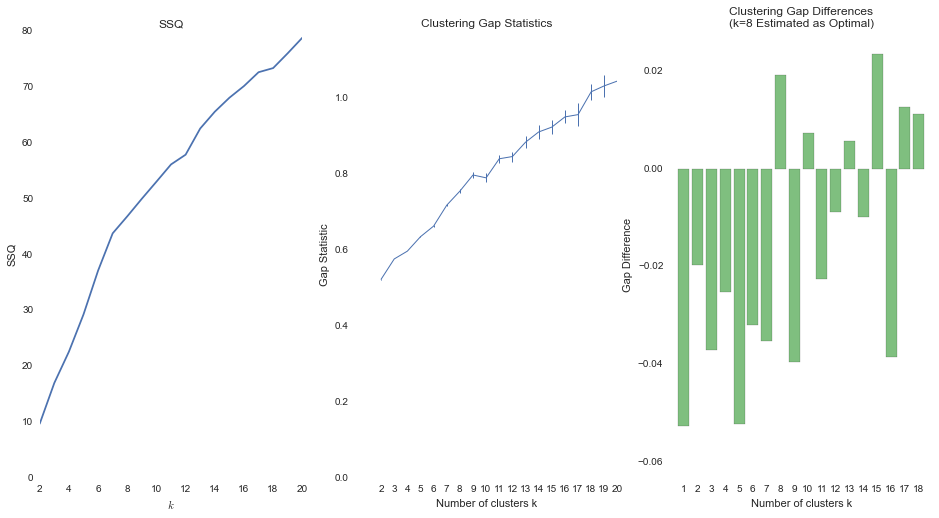

In [258]:
#Task 4f:
#Vary k from 2 to 20
# Call  t4e_cluster_friends with the k.
# Plot SSQ, gap statistics and gap differences
def t4f_plot_cluster_metrics(data):
    pass
    plt.figure()
    fig,axes = plt.subplots(1, 3, figsize=(16, 8))
    ks_t4f = range(2, 21)
    ssqs = ssq_statistics(data, ks=ks_t4f)
        #Change below: create a line chart with x axis as different k values 
        #and y-axis as ssqs on axes[1] variable    
    axes[0].plot(ks_t4f,ssqs)
    axes[0].set_title("SSQ")
    axes[0].set_xlabel("$k$")
    axes[0].set_ylabel("SSQ")
    
    
    gaps, errs, difs = gap_statistics(data, ks=range(2, 21))
            
    #Create an errorbar plot
    rects = axes[1].errorbar(ks_t4f, gaps, yerr=errs, xerr=None, linewidth=1.0)

    #Add figure labels and ticks
    axes[1].set_title('Clustering Gap Statistics')
    axes[1].set_xlabel('Number of clusters k')
    axes[1].set_ylabel('Gap Statistic')
    axes[1].set_xticks(ks_t4f)
    # Add figure bounds
    axes[1].set_ylim(0, max(gaps+errs)*1.1)
    axes[1].set_xlim(0, len(gaps)+1.0)

    ind = range(1,len(difs)+1) # the x values for the difs
    
    max_gap = None
    if len(np.where(difs > 0)[0]) > 0:
        max_gap = np.where(difs > 0)[0][0] + 1 # the k with the first positive dif

    #Create a bar plot
    axes[2].bar(ind, difs, alpha=0.5, color='g', align='center')

    # Add figure labels and ticks
    if max_gap:
        axes[2].set_title('Clustering Gap Differences\n(k=%d Estimated as Optimal)' % (max_gap))
    else:
        axes[2].set_title('Clustering Gap Differences\n')
    axes[2].set_xlabel('Number of clusters k')
    axes[2].set_ylabel('Gap Difference')
    axes[2].xaxis.set_ticks(range(1,len(difs)+1))

    #Add figure bounds
    axes[2].set_ylim(min(difs)*1.2, max(difs)*1.2)
    axes[2].set_xlim(0, len(difs)+1.0)

t4f_plot_cluster_metrics(t4_friend_likes_as_vectors)

In [371]:
#Task 4g
#Find optimal k using Gap difference Statistics (i.e find first non zero value)
# you can set it by seeing the plot above

t4g_opt_k = 8
t4g_best_clusterings = t4e_cluster_friends(t4_friend_likes_as_vectors, t4g_opt_k )
#print t4g_best_clusterings.labels_

In [370]:
#Task 4h
#t4g_best_clusterings is a complex object with lot of interesting information
# Let us know try to print it in an intuitive way

#In the function below, use the clusterings to print the name of your friends in each cluster
# The output should look like:
# Cluster 1: X, Y,Z
# Cluster 2: A,B,C,D etc
#t4h_cluster_assignments = np.unique(best_clusterings.labels_)

def t4h_print_cluster_with_friend_names(best_clusterings, indices_to_friend_names):
    for i in np.unique(best_clusterings.labels_):
        print "Cluster ",i+1
        for j in range(len(indices_to_friend_names)):
            if best_clusterings.labels_[j] == i:
                print indices_to_friend_names[j]
    pass   

t4h_print_cluster_with_friend_names(t4g_best_clusterings, t4_indices_to_friend_names)



Cluster  1
Suresh Ravi
Shyam Subramanian
Sai Ram
Nikin Bhargav
Akilesh Rajan
Sowmiya Ragu
Vivek Vaidyanathasubramanian
Saravanan Thirumuruganathan
Aditya Vudayagiri
Divya Bharathi
Afifa Kauser Shariff
Vignesh Rao
Suhani Mehta
Dasari Prakashini
Sathvik Reddy
Kamal Prakash
Adeetya Ravisankar
Vaikunth Sridharan
Vivek Rahul
Prashanth Gandhidoss
Sujay Natarajan
Eshwar Ravindran
Gayathri Viswanathan
Benita John William
Viswanathan Kr
C Amrish Khanna
Divya Sakthivel
SreeRathan Chadalavada
Senthill Anand
Celaxtin Mariyan
Vishwa Nathan
Sundararajan Vedapuri
Cluster  2
Vivek Arvind
Cluster  3
Venkatesh Gandhi Rajan
Cluster  4
Gowtham Vengu
Cluster  5
Bharatwaj Sankaran
Cluster  6
Hemanth Kumar
Cluster  7
Sharick Anwar
Cluster  8
Deepak Raj


In [416]:
#Task 4i
#Here is another interesting thing to find from the data
# Given a clustering, let us find the set of most representative friends in each cluster
# Here is the idea:
#   For each cluster:
#      find h friends who have the lowest distance to that cluster's centroid and print them
#a = np.unique(t4g_best_clusterings.cluster_centers_)
#print a
b = t4g_best_clusterings.cluster_centers_
#print b
def t4i_print_top_representative_friends(best_clusterings, h=1):
    #c = metrics.pairwise.euclidean_distances(best_clusterings.cluster_centers_,t4_friend_likes_as_vectors)
    #print c
    #print min(c)
    #dist = []
    
    for i in range(len(best_clusterings.cluster_centers_)):
        #print "Cluster ",i+1
        
        for j in range(len(t4_indices_to_friend_names)):
            if best_clusterings.labels_[j] == i:
                c = metrics.pairwise.euclidean_distances(best_clusterings.cluster_centers_,t4_friend_likes_as_vectors)
                d =  t4_indices_to_friend_names[j]
                #dist.append((c,d))
        print '\n \n Euclidean distances are', c
        print '\n Closest friend in cluster', i+1, 'is', d[:25]
        
    pass
t4i_print_top_representative_friends(t4g_best_clusterings, 5)


 
 Euclidean distances are [[ 15.98167896  22.81943388  19.61763397  12.89531165  15.73734611
   16.93669279  12.03283269  17.4868254    6.7528929   12.24393983
   13.75369269  14.73436672  29.05665264   9.60671965   7.72425158
    7.66332581  15.77899117   8.85517151  16.57110625  14.95958096
   18.64072323  27.20825357  12.74908085  26.6535938   33.11874941
   12.20047386  13.79679537  10.30056127  35.29662254  12.55394609
   11.52070148  12.21583245  20.46433636  16.36617128  19.09126927
    7.23543796  30.40109476  17.30358525  12.13369534]
 [ 38.88444419  38.79432948  38.92300091  38.20994635  38.34057903
   38.15756806  36.87817783  38.87158345  36.91882988  37.77565354
   38.74274126  38.72983346  43.829214    37.13488926  37.17526059
   36.81032464  38.52272057  37.22902094  38.18376618  37.38983819
   39.03844259  43.58898944  37.89459064  40.42276586  44.66542287
   37.49666652  37.25587202  37.46998799   0.          38.06573262
   37.22902094  38.13135193  40.          38.2

In [92]:
#OPTIONAL tasks - these will not be graded
#Typically, the k-means results will not be that great
# It is definitely insightful but not very
# There are a lot of reasons why it is so - In fact thinking why k-means is a bad idea 
#   is a great question to ponder
# Here are some simple reasons:
#   The data is sparse: for eg, lot of friends did not specify what they like
#   The data is noisy: for eg, there might be different pages for same entity (eg, two pages for say India)
#   The data is incomplete: a good analysis must use lot of other parameters 
#           such as their bio, facebook posts, local network topology etc
#   Curse of dimensionality - ponder why is this a factor
#   Metrics used - Does Euclidean distance between friends makes sense? Why or why not?
#     If it is not, then K-Means is not the right choice (why? make sure you understand why)
#  Lot of other reasons

#Here are some interesting improvements that you can try on your own
# Do hierarchical clustering with different metrics and different linkage and plot resulting dendrograms
#   While sklearn does not have relevant functions for automatically finding k in hierarchical clustering
#    there are other libraries (some in Python, some in R) that do
#  Try doing the analysis there

# Try other metrics such as Hamming distance, weighted hamming and also try other algorithms
#   such as k-medoids, k-mean etc

# Try adding more features such as bio and their friends

# Try adding more complex features - eg, collect their post from last 3 months, do some topic model on them 
#  and clustering this augmented vector

# Compare the output of network-unaware (ie not using network topology) clustering such as k-means
#  with that of graph partitioning algorithms

# Many more that I cannot think of right now :)


# Part 5. Dimensionality Reduction

Dimensionality reduction is a key data pre-processing technique. In this task, you will perform PCA, a popular dimensionality reduction technique, over few images to get an intuition. Then you will apply it to MNIST data from Programming Assignment 2 to see how it performs.

In [260]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data

#Also, if you have downloaded it for PA2, just copy it into this folder and it will work fine.
mnist = fetch_mldata("MNIST original", data_home=".")       
             
                                                                                                                            
 
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        

#Recall that in PA2 we used shuffle and assigned first 5000 data as training and remaining as testing
# Here is another way to do this
# Here we are using a function in cross validation module to split 
# By convention, let us use a 70/30 split
p5_train_data, p5_test_data, p5_train_labels, p5_test_labels = \
        train_test_split(mnist.data, mnist.target, test_size=0.3)

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
p5_train_data = p5_train_data / 255.0                                        
p5_test_data = p5_test_data / 255.0

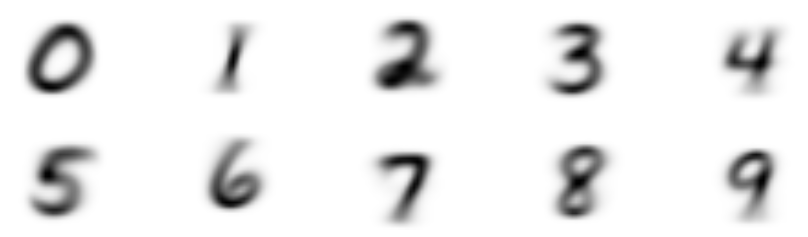

In [261]:
#Task t5a:
# Plot the average value of all digits

plt.figure()
fig,axes = plt.subplots(2, 5, figsize=(15,4))

for i in range(10):
    t5a_row, t5a_col = i // 5, i%5
    
    #Change below: Subset p5_train_data with images for digit i only 
    # Possible to do it 1 liner (similar to how it is done in Pandas)
    t5a_digit_i_subset = p5_train_data[np.where(p5_train_labels==i),:]
    #print t5a_digit_i_subset.shape
    
    #Change below: compute avg value of t5a_training_data_sevens_only and t5a_training_data_nines_only 
    # remember to use a vectorized version of mean for efficiency
    #t5a_training_data_sevens_only = p5_train_data[p5_train_labels==7]
    #t5a_training_data_nines_only  = p5_train_data[p5_train_labels==9]
    t5a_digit_i_subset_mean = np.mean(t5a_digit_i_subset, axis=1)
    #print t5a_digit_i_subset_mean
    
    #Do not change below
    axes[t5a_row][t5a_col].imshow( t5a_digit_i_subset_mean.reshape(28,28), cmap="Greys") 
    axes[t5a_row][t5a_col].grid(False)
    axes[t5a_row][t5a_col].get_xaxis().set_ticks([])
    axes[t5a_row][t5a_col].get_yaxis().set_ticks([])
#print t5a_digit_i_subset[0,:]

In [262]:
#Task t5b: train a multi class classifier (OneVsRest) with LinearSVC class and make predictions and print it. 

t5b_start_time = time.time()

#Change below: OvR classifier with LinearSVC class with default parameters and random state of 1234
t5b_mc_ovr_linear_svc_svm_model = OneVsRestClassifier(LinearSVC(random_state=1234))
#Change below: Train the model
t5b_mc_ovr_linear_svc_svm_model.fit(p5_train_data, p5_train_labels)
print "SVM training over all features took %s seconds" % (time.time() - t5b_start_time)

#Change below: Make predictions using the model
t5b_mc_ovr_predictions_linear_svm_svc = t5b_mc_ovr_linear_svc_svm_model.predict(p5_test_data)


print "SVM over all features has an accuracy score of %s" % (
    metrics.accuracy_score(p5_test_labels, t5b_mc_ovr_predictions_linear_svm_svc))

SVM training over all features took 104.400119066 seconds
SVM over all features has an accuracy score of 0.911476190476


In [263]:
#Task t5c

#Remember that MNIST images are 28x28 => 784 features.
#  Often the entire data is not needed and we can find interesting structure in lower dimensions
# Let us see how this works
#You might want to check http://scikit-learn.org/stable/modules/decomposition.html#decompositions for details


#Let us arbitrarily pick number of components as 100
t5c_start_time = time.time()
#Change below: instantiate PCA object with 100 components
t5c_pca = PCA(n_components=100)
t5c_pca.fit(p5_train_data)
#Change below: transform the training and test class data
t5c_train_data_pca = t5c_pca.transform(p5_train_data)
t5c_test_data_pca = t5c_pca.transform(p5_test_data)

print "PCA and transformation took %s seconds" % (time.time() - t5c_start_time)


t5c_start_time = time.time()
#Change below: OvR classifier with LinearSVC class with default parameters and random state of 1234
t5c_mc_ovr_linear_svc_svm_model = OneVsRestClassifier(LinearSVC(random_state=1234))
#Change below: Train the model using the TRANSFORMED training data
t5c_mc_ovr_linear_svc_svm_model.fit(t5c_train_data_pca,p5_train_labels)
print "SVM training over top-100 components took %s seconds" % (time.time() - t5c_start_time)

#Change below: Make predictions using the model over the TRANSFORMED testing data
t5c_mc_ovr_predictions_linear_svm_svc = t5c_mc_ovr_linear_svc_svm_model.predict(t5c_test_data_pca)



print "SVM over top-100 components has an accuracy score of %s" % (
    metrics.accuracy_score(p5_test_labels, t5c_mc_ovr_predictions_linear_svm_svc))

PCA and transformation took 12.3389899731 seconds
SVM training over top-100 components took 88.4686338902 seconds
SVM over top-100 components has an accuracy score of 0.907285714286


In [264]:
#Task t5d: Heads up - This is a time consuming task 
# on my virtual machine with 4gb ram, it took approximately 30 minutes


#Means 1,2,3,4,5, 10, 20, 30, 40,, ... 200, 784
t5d_num_dimensions_to_test = list(reversed([1,2,3,4,5] + range(10, 200+1, 10) + [784]))

#Let us now see how varying number of components affects time and accuracy
t5d_columns = ["Num Components", "PCA Time", "Training Time", "Total Time", "Accuracy"]
t5d_results_df = DataFrame(0, index = t5d_num_dimensions_to_test, columns = t5d_columns)

for k in t5d_num_dimensions_to_test:
    print "Handling num dimensions = ", k
    t5d_start_time = time.time()
    
    #Change below: instantiate PCA object with k components
    t5d_pca = PCA(n_components=k)
    
    t5d_pca.fit(p5_train_data)
    
    #Change below: transform the training and testing class data
    t5d_train_data_pca = t5d_pca.transform(p5_train_data)
    t5d_test_data_pca = t5d_pca.transform(p5_test_data)
    
    t5d_pca_time = time.time() - t5d_start_time
    
    t5d_start_time = time.time()
    #Change below: OvR classifier with LinearSVC class with default parameters and random state of 1234
    t5d_mc_ovr_linear_svc_svm_model = OneVsRestClassifier(LinearSVC(random_state=1234))
    #Change below: Train the model using the TRANSFORMED training data
    t5d_mc_ovr_linear_svc_svm_model.fit(t5d_train_data_pca,p5_train_labels)
    
    t5d_training_time = time.time() - t5d_start_time
    
    
    #Change below: Make predictions using the model over the TRANSFORMED testing data
    t5d_mc_ovr_predictions_linear_svm_svc = t5d_mc_ovr_linear_svc_svm_model.predict(t5d_test_data_pca)
    #Change below: Compute the accuracy score
    t5d_accuracy = metrics.accuracy_score(p5_test_labels,t5d_mc_ovr_predictions_linear_svm_svc)

    #update df
    t5d_results_df.ix[k] = [k, t5d_pca_time, t5d_training_time, 
                                t5d_pca_time + t5d_training_time, t5d_accuracy]
    
display(t5d_results_df)

Handling num dimensions =  784
Handling num dimensions =  200
Handling num dimensions =  190
Handling num dimensions =  180
Handling num dimensions =  170
Handling num dimensions =  160
Handling num dimensions =  150
Handling num dimensions =  140
Handling num dimensions =  130
Handling num dimensions =  120
Handling num dimensions =  110
Handling num dimensions =  100
Handling num dimensions =  90
Handling num dimensions =  80
Handling num dimensions =  70
Handling num dimensions =  60
Handling num dimensions =  50
Handling num dimensions =  40
Handling num dimensions =  30
Handling num dimensions =  20
Handling num dimensions =  10
Handling num dimensions =  5
Handling num dimensions =  4
Handling num dimensions =  3
Handling num dimensions =  2
Handling num dimensions =  1


,Num Components,PCA Time,Training Time,Total Time,Accuracy
784,784,13.749578,233.512809,247.262387,0.911571
200,200,12.236085,125.111233,137.347318,0.912143
190,190,10.902807,120.383719,131.286526,0.911381
180,180,10.863679,119.492311,130.355990,0.911476
170,170,11.523718,118.039560,129.563278,0.911095
160,160,11.098507,116.038833,127.137340,0.911619
150,150,10.774728,110.963507,121.738235,0.910333
140,140,10.852039,106.982481,117.834520,0.909429
130,130,11.108916,104.513741,115.622657,0.909762
120,120,11.456766,92.959054,104.415820,0.908190


Total variance explained with 100 components is  0.915025753244


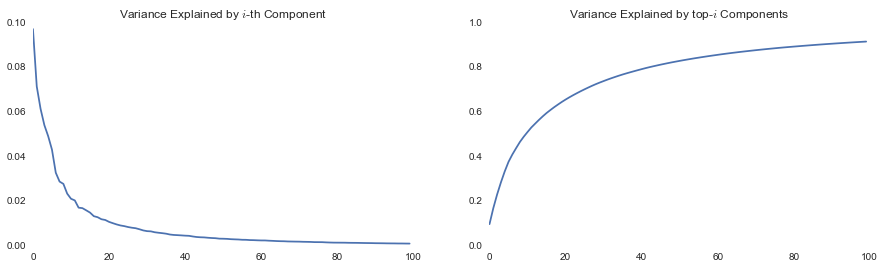

In [265]:
#Task t5e

#Let us again consider the model from task 5c where did PCA with 100 components
t5e_pca = t5c_pca

#As we saw in class, one way to determine how much components is to use
# is to set it to the smallest value such that it explained 95% of the variance
# Let us how much variance does 100 components explain

#Change below: using t5e_pca variable, print the cumulative variance that is explained
print "Total variance explained with 100 components is ", np.sum(t5e_pca.explained_variance_ratio_)

plt.figure()
fig,axes = plt.subplots(1, 2, figsize=(15,4))

# Change below: plot the explained variance of these 100 components
axes[0].plot(t5e_pca.explained_variance_ratio_)
axes[0].set_title('Variance Explained by $i$-th Component')

# Change below: plot the cumulative explained variance of these 100 components
#Hint: numpy has a function for cumulative sum
axes[1].plot(np.cumsum(t5e_pca.explained_variance_ratio_))
axes[1].set_title('Variance Explained by top-$i$ Components')
plt.show()

